# Lasso Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [9]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

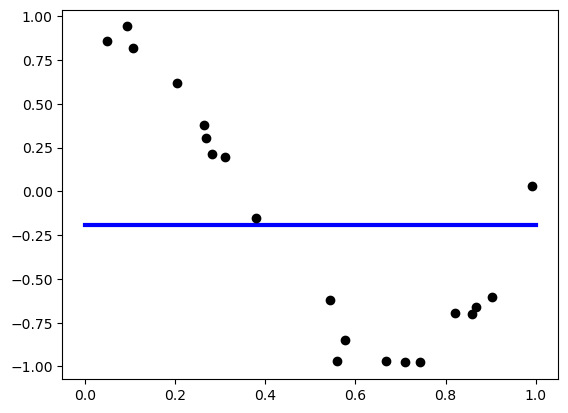

In [10]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


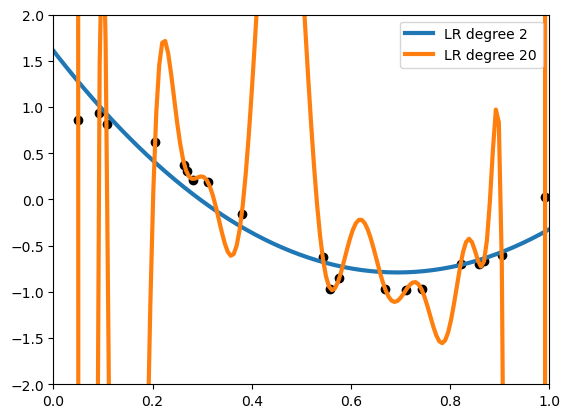

In [11]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

In [12]:
poly_20_degree = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
lasso_20_degree_1 = Lasso(alpha=1)
lasso_20_degree_10 = Lasso(alpha=10000)
lasso_20_degree_01 = Lasso(alpha=0.0001)

poly_20_degree.fit(x, y)
lasso_20_degree_1.fit(x, y)
lasso_20_degree_10.fit(x, y)
lasso_20_degree_01.fit(x, y)

Lasso(alpha=0.0001)

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [13]:
from sklearn.model_selection import GridSearchCV

degrees = np.arange(1, 11)
alphas = [0.01, 0.1, 1, 10, 100]

grid_search = GridSearchCV(
    make_pipeline(PolynomialFeatures(), Lasso()),
    param_grid={"polynomialfeatures__degree": degrees, "lasso__alpha": alphas},
    scoring="neg_mean_absolute_error",
)

grid_search.fit(x, y)

print("Best Degree:", grid_search.best_params_["polynomialfeatures__degree"])
print("Best Alpha:", grid_search.best_params_["lasso__alpha"])
print("Best R-squared:", grid_search.best_score_)

Best Degree: 5
Best Alpha: 0.01
Best R-squared: -0.360829394088176


# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [14]:
import pandas as pd
df_adv = pd.read_csv(
    "https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv",
    index_col=0,
)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
degrees = np.arange(1, 11)
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

grid_search = GridSearchCV(
    make_pipeline(PolynomialFeatures(), Lasso(max_iter=10000)),
    param_grid={"polynomialfeatures__degree": degrees, "lasso__alpha": alphas},
    scoring="neg_mean_absolute_error",
)

grid_search.fit(X, y)

print("Best Degree:", grid_search.best_params_["polynomialfeatures__degree"])
print("Best Alpha:", grid_search.best_params_["lasso__alpha"])
print("Best R-squared:", grid_search.best_score_)

/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+01, tolerance: 4.383e-01
  model = cd_fast.enet_coordinate_descent(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e+01, tolerance: 4.218e-01
  model = cd_fast.enet_coordinate_descent(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali